In [4]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Dataset (diskon dalam persen dan penjualan setelah diskon)
diskon = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90]).reshape(-1, 1)
penjualan = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10])

# Membuat model Linear Regression
model = LinearRegression()
model.fit(diskon, penjualan) #untuk belajar variabel dependen dan independen ,menentukan slope jg intercept

# Mencetak koefisien kemiringan (slope) dan intercept
print("Koefisien kemiringan (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Prediksi jumlah penjualan untuk diskon 75%
diskon_prediksi = np.array([75]).reshape(-1, 1)
penjualan_prediksi = model.predict(diskon_prediksi)

print("Prediksi jumlah penjualan untuk diskon 75%:", penjualan_prediksi[0])



Koefisien kemiringan (slope): -1.0
Intercept: 100.0
Prediksi jumlah penjualan untuk diskon 75%: 25.0


Iteration 0: Cost 3166.6666666666665, w 0.3666666666666667, b 0.01
Iteration 100: Cost 2087.2314592176012, w 0.572209244447876, b 0.4333660299611644
Iteration 200: Cost 2069.7325507442156, w 0.5656048374163675, b 0.8516173408585886
Iteration 300: Cost 2052.380349429926, w 0.559028173633661, b 1.268111696116436
Iteration 400: Cost 2035.1736253128445, w 0.5524791365582034, b 1.6828564762091687
Iteration 500: Cost 2018.1111587428231, w 0.5459576101379995, b 2.0958590306079614
Iteration 600: Cost 2001.1917402950016, w 0.5394634788085559, b 2.5071266779109376
Iteration 700: Cost 1984.414170684085, w 0.5329966274908331, b 2.9166667059728546
Iteration 800: Cost 1967.7772606793324, w 0.5265569415892054, b 3.324486372034253
Iteration 900: Cost 1951.2798310202636, w 0.5201443069894319, b 3.7305929028500477
Koefisien kemiringan (slope): 0.5138223340564572
Intercept: 4.130957909740115
Prediksi jumlah penjualan untuk diskon 75%: 42.6676329639744


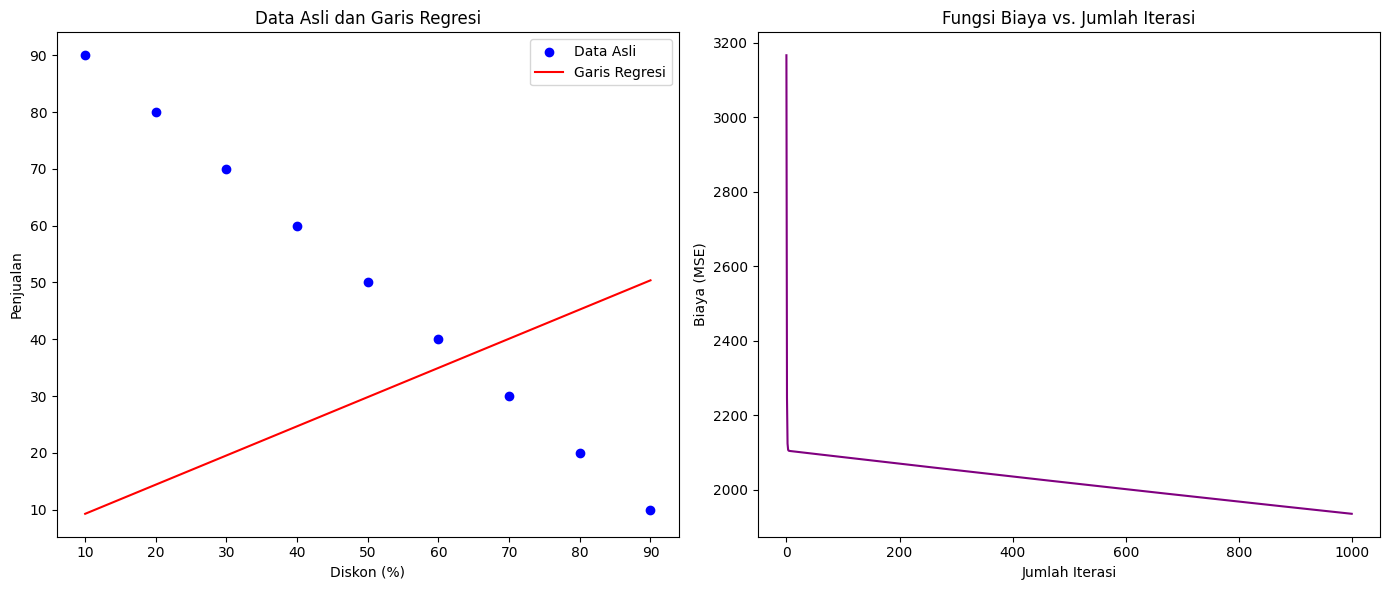

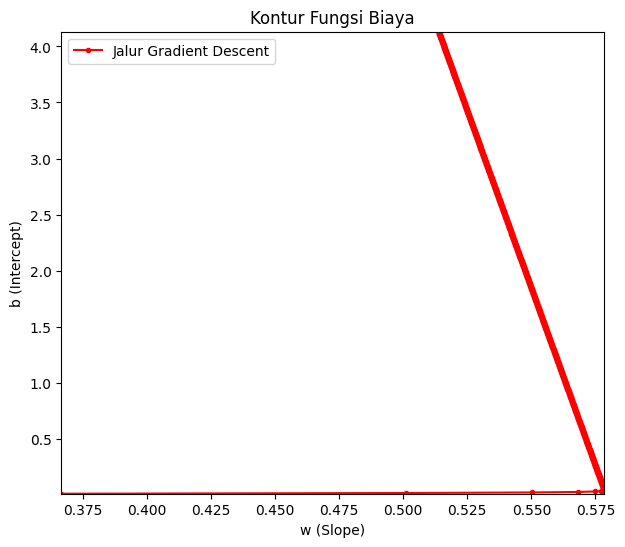

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset (diskon dalam persen dan penjualan setelah diskon)
diskon = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
penjualan = np.array([90, 80, 70, 60, 50, 40, 30, 20, 10])

# Inisialisasi parameter
w = 0.0  # slope
b = 0.0  # intercept
learning_rate = 0.0001
num_iterations = 1000

# Menyimpan sejarah untuk visualisasi
w_history = []
b_history = []
cost_history = []

# Gradient Descent
m = len(diskon)

for i in range(num_iterations):
    # Forward Propagation: Hitung prediksi
    penjualan_prediksi = w * diskon + b
    
    # Perhitungan Kesalahan: Hitung error
    error = penjualan_prediksi - penjualan
    
    # Fungsi biaya (MSE)
    cost = (1/m) * np.sum(error ** 2)
    
    # Backward Propagation: Hitung gradien
    dw = (2/m) * np.dot(error, diskon)
    db = (2/m) * np.sum(error)
    
    # Pembaruan Parameter
    w -= learning_rate * dw
    b -= learning_rate * db
    
    # Simpan sejarah
    w_history.append(w)
    b_history.append(b)
    cost_history.append(cost)
    
    # Cetak biaya untuk memonitor kemajuan
    if i % 100 == 0:
        print(f"Iteration {i}: Cost {cost}, w {w}, b {b}")

# Setelah gradient descent
print("Koefisien kemiringan (slope):", w)
print("Intercept:", b)

# Prediksi jumlah penjualan untuk diskon 75%
diskon_prediksi = np.array([75])
penjualan_prediksi = w * diskon_prediksi + b

print("Prediksi jumlah penjualan untuk diskon 75%:", penjualan_prediksi[0])

# Visualisasi

# Plot Data Asli dan Garis Regresi
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(diskon, penjualan, color='blue', label='Data Asli')
plt.plot(diskon, w * diskon + b, color='red', label='Garis Regresi')
plt.xlabel('Diskon (%)')
plt.ylabel('Penjualan')
plt.title('Data Asli dan Garis Regresi')
plt.legend()

# Plot Fungsi Biaya terhadap Jumlah Iterasi
plt.subplot(1, 2, 2)
plt.plot(range(num_iterations), cost_history, color='purple')
plt.xlabel('Jumlah Iterasi')
plt.ylabel('Biaya (MSE)')
plt.title('Fungsi Biaya vs. Jumlah Iterasi')

plt.tight_layout()
plt.show()

# Visualisasi Kontur (Opsional)
W, B = np.meshgrid(np.linspace(min(w_history), max(w_history), 100),
                   np.linspace(min(b_history), max(b_history), 100))
Z = np.array([np.mean((w * diskon + b - penjualan)**2) for w, b in zip(np.ravel(W), np.ravel(B))])
Z = Z.reshape(W.shape)

plt.figure(figsize=(7, 6))
plt.contour(W, B, Z, levels=np.logspace(-1, 3, 20), cmap='viridis')
plt.plot(w_history, b_history, 'r.-', label='Jalur Gradient Descent')
plt.xlabel('w (Slope)')
plt.ylabel('b (Intercept)')
plt.title('Kontur Fungsi Biaya')
plt.legend()
plt.show()
